In [ ]:
# Basic ML & Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sakshisaware","key":"6ffef80c63e45ad116fbac4a45c84e73"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list


ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
rakeshkapilavai/extrovert-vs-introvert-behavior-data            Extrovert vs. Introvert Behavior Data                   31277  2025-06-13 14:26:48.303000          17525        386  1.0              
bismasajjad/global-ai-job-market-and-salary-trends-2025         Global AI Job Market & Salary Trends 2025              529004  2025-06-01 07:20:49.537000           5959         97  0.9411765        
adilshamim8/social-media-addiction-vs-relationships             Students' Social Media Addiction                         7851  2025-05-10 14:38:02.713000          16738        254  1.0              
thero

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 468MB/s]


In [ ]:
!unzip house-prices-advanced-regression-techniques.zip


Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd

# Load the training dataset
df = pd.read_csv("train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()
df.describe()
df.isnull().sum()
selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'GarageCars', 'TotalBsmtSF']
X = df[selected_features]
y = df['SalePrice']



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'GarageCars', 'TotalBsmtSF']
X = df[selected_features]
y = df['SalePrice']


In [ ]:
X = X.fillna(X.mean())


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 1875133455.2111044
R² Score: 0.7555340666666697


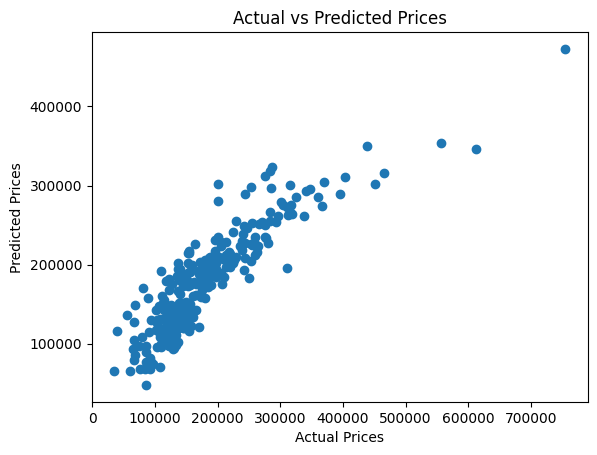

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1875133455.2111044
R² Score: 0.7555340666666697


In [ ]:
new_house = pd.DataFrame({
    'GrLivArea': [1800],
    'BedroomAbvGr': [3],
    'FullBath': [2],
    'GarageCars': [2],
    'TotalBsmtSF': [1000]
})

# Predict the price
predicted_price = model.predict(new_house)

# Display the result
print("Predicted House Price: ${:,.2f}".format(predicted_price[0]))



Predicted House Price: $209,038.83
